# Clustering Analysis - Visualization of Clustering Results

In this notebook, we will generate various visualizations to aid in the interpretation of the clustering results. These visualizations will help us understand the distribution and characteristics of the clusters formed in the customer segmentation analysis.


## Step 1: Importing Libraries and Loading Configuration

In this step, we will import the necessary libraries and load the configuration settings. This will set up the environment needed to generate the visualizations. The configuration file will guide the paths to the clustered datasets, which we'll use for visualization.


In [3]:
import os
import json  # Import the json module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define the path to the config file
config_path = os.path.join(os.path.dirname(os.path.abspath('')), '..', 'config.json')

# Load the configuration
with open(config_path, 'r') as f:
    config = json.load(f)

# Utility function to convert relative path to absolute path
def to_absolute_path(relative_path, start_path):
    return os.path.abspath(os.path.join(start_path, relative_path))

# Define the project root and load paths from the config
project_root = os.path.dirname(os.path.dirname(os.path.abspath('')))
min_max_clusters_path = to_absolute_path(config['min-max_scaled_4_clusters_path'], project_root)
standard_clusters_path = to_absolute_path(config['standard_scaled_4_clusters_path'], project_root)


## Step 2: Loading the Clustered Datasets

Next, we'll load the clustered datasets for both Min-Max scaled and Standard scaled data. This data contains the cluster assignments from our previous K-means clustering analysis. These datasets will be used to create various visualizations that help us interpret the clustering results.


In [6]:
# Load the datasets
df_min_max_clusters = pd.read_csv(min_max_clusters_path)
print(f"Min-Max scaled clusters data loaded successfully from {min_max_clusters_path}")

df_standard_clusters = pd.read_csv(standard_clusters_path)
print(f"Standard scaled clusters data loaded successfully from {standard_clusters_path}")


Min-Max scaled clusters data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\kmeans_model\min-max_scaled_4_clusters.csv
Standard scaled clusters data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\kmeans_model\standard_scaled_4_clusters.csv


## Step 3: Defining the Visualization Functions

In this step, we will define several functions to generate different types of visualizations:
- **Scatter Plot with Centroids:** Visualize the distribution of customers within clusters, along with the cluster centroids.
- **Boxplots:** Show the distribution of tenure and monthly charges within each cluster.
- **Cluster Distribution Plot:** Display the number of customers in each cluster.
- **Heatmap of Cluster Characteristics:** Summarize the mean tenure and monthly charges for each cluster using a heatmap.

These visualizations will provide insights into the characteristics and distribution of each cluster, making it easier to interpret the results of the clustering analysis.


In [10]:
# Define the path for saving visualizations
visualizations_path = os.path.join(project_root, 'Clustering_Analysis', 'visualizations')
os.makedirs(visualizations_path, exist_ok=True)

# Function to compute centroids
def compute_centroids(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['tenure', 'MonthlyCharges']])
    centroids = kmeans.cluster_centers_
    return centroids

# Function to plot scatter plot of clusters with centroids
def plot_cluster_scatter(df, scaling_label, save_path, n_clusters):
    centroids = compute_centroids(df, n_clusters)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'Customer Segments based on Tenure and Monthly Charges ({scaling_label})')
    plt.xlabel('Tenure')
    plt.ylabel('Monthly Charges')
    plt.legend(title='Cluster')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_scatter_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()

# Function to plot boxplots of clusters
def plot_cluster_boxplots(df, scaling_label, save_path):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='tenure', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Tenure by Cluster ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Tenure')
    plt.tight_layout()
    file_path_tenure = os.path.join(save_path, f'cluster_boxplot_tenure_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path_tenure)
    plt.show() 
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='MonthlyCharges', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Monthly Charges by Cluster ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Monthly Charges')
    plt.tight_layout()
    file_path_charges = os.path.join(save_path, f'cluster_boxplot_charges_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path_charges)
    plt.show() 
    plt.close()

# Function to plot distribution of clusters
def plot_cluster_distribution(df, scaling_label, save_path):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Cluster Distribution ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_distribution_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()

# Function to plot heatmap of cluster characteristics
def plot_cluster_heatmap(df, scaling_label, save_path):
    cluster_summary = df.groupby('Cluster').agg({
        'tenure': 'mean',
        'MonthlyCharges': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_summary.set_index('Cluster').T, annot=True, cmap='viridis')
    plt.title(f'Cluster Heatmap ({scaling_label})')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_heatmap_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()


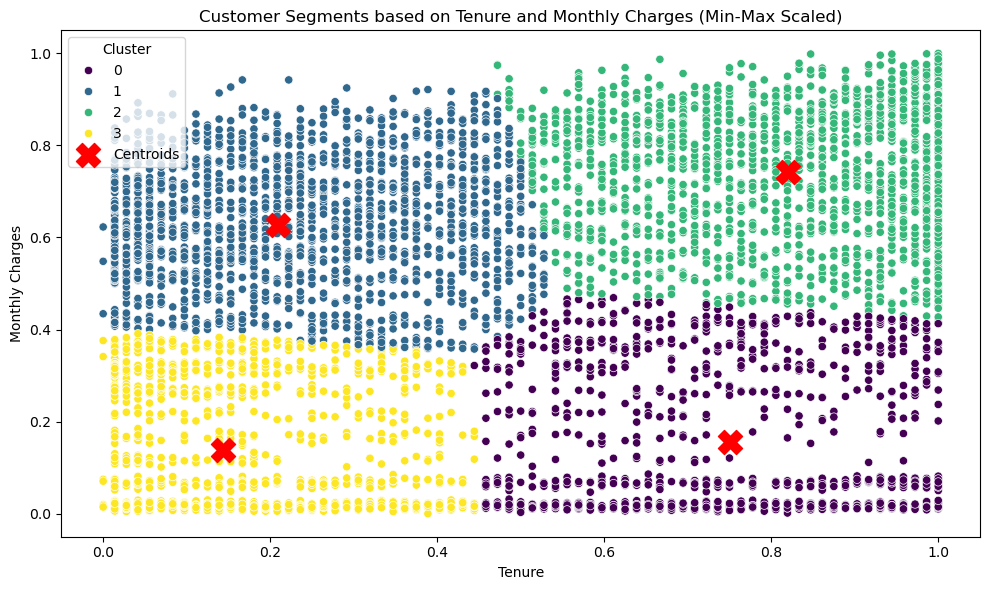

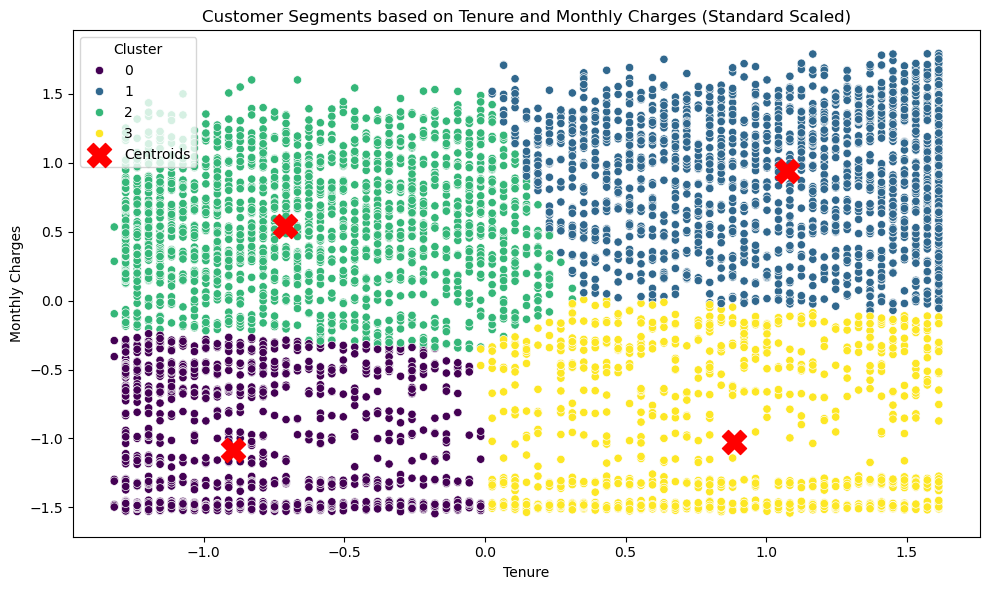

In [11]:
# Generate visualizations for Min-Max scaled clusters and standard scaled clusters
plot_cluster_scatter(df_min_max_clusters, 'Min-Max Scaled', visualizations_path, n_clusters=4)
plot_cluster_scatter(df_standard_clusters, 'Standard Scaled', visualizations_path, n_clusters=4)

### **First Plot: Min-Max Scaled Data**
This plot displays customer segments based on Min-Max scaled tenure and monthly charges. K-means clustering reveals four clusters, each color-coded, with centroids marked by red "X" symbols. Min-Max scaling normalizes the data, clearly showing how customers are grouped based on their relative values.

### **Second Plot: Standard Scaled Data**
This plot shows customer segments based on standardized tenure and monthly charges. Four distinct clusters are identified using K-means, each represented by different colors, with red "X" marks indicating the centroids. Standard scaling ensures equal contribution from both features in forming clear, separated customer groups.
ues.


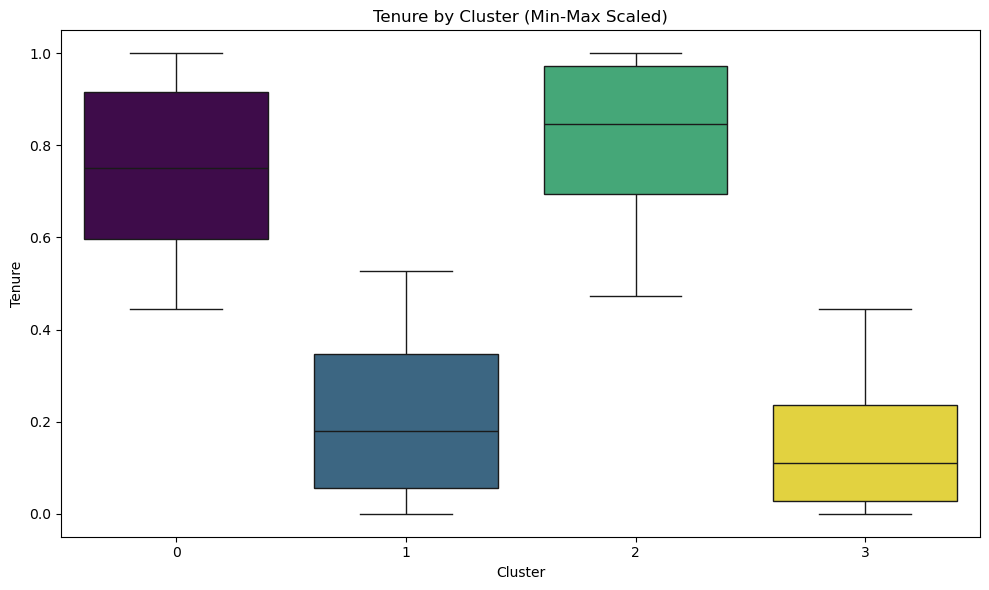

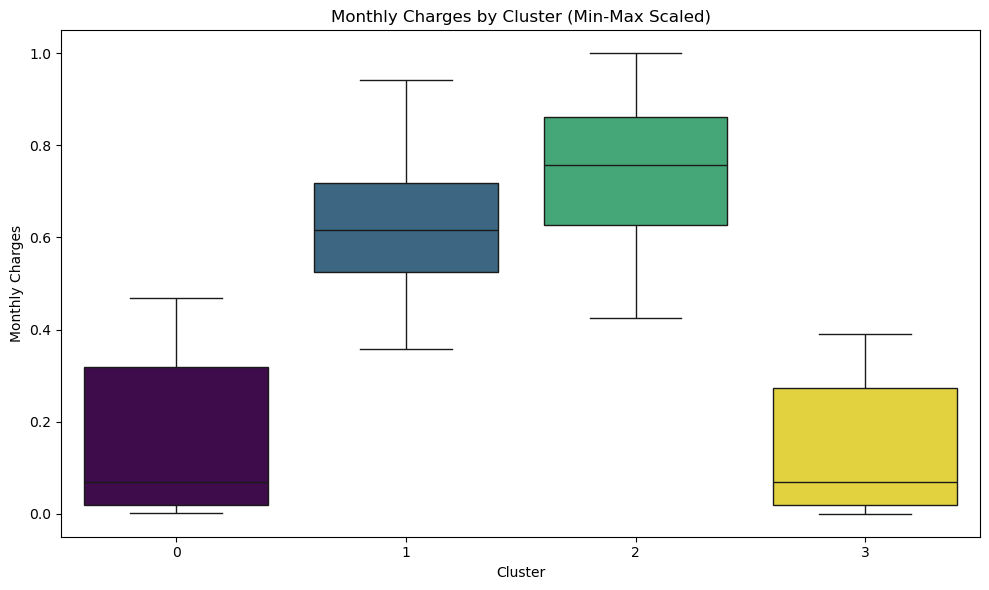

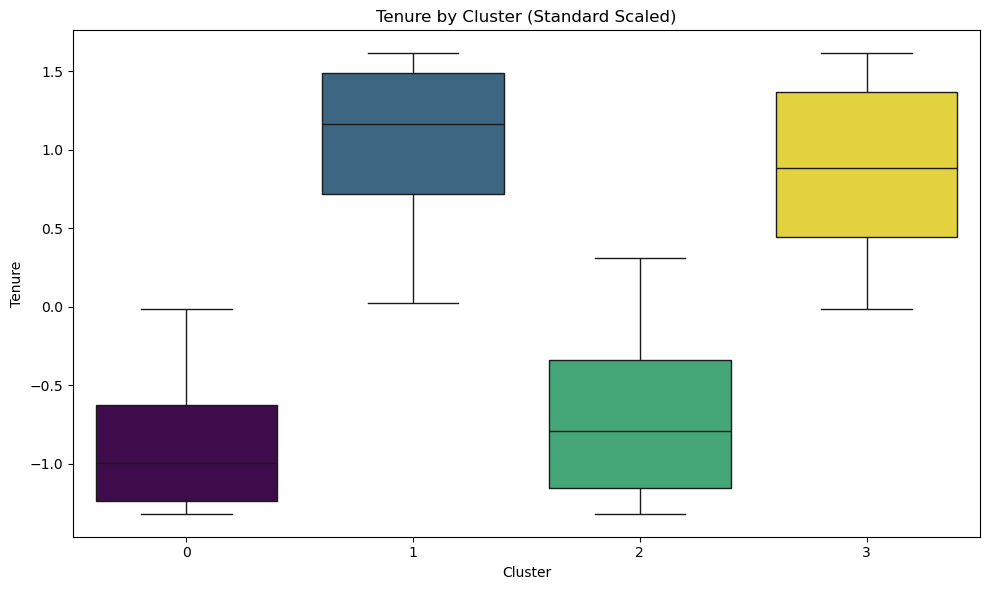

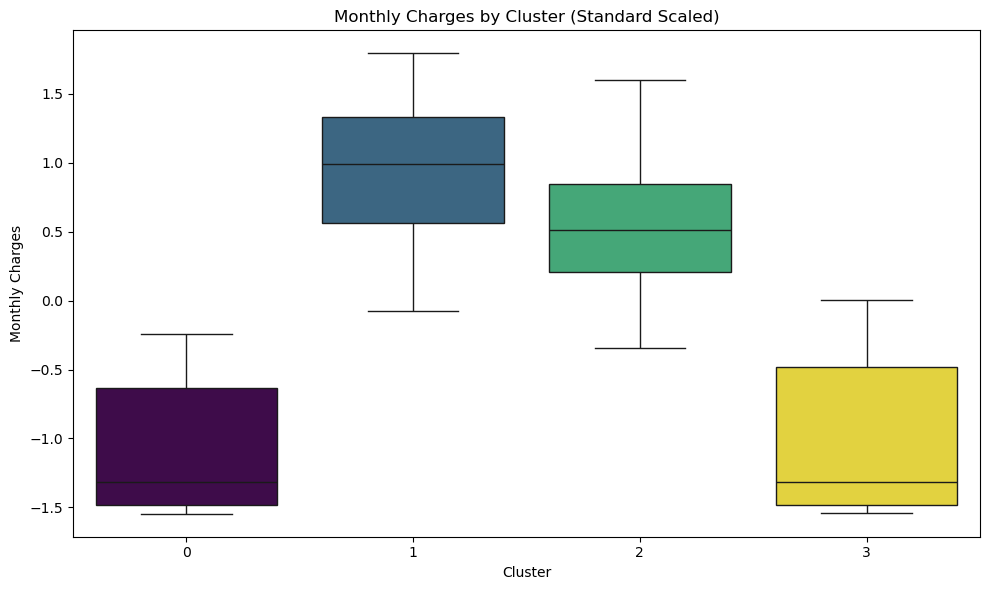

In [17]:
#plot_cluster_boxplots for both min-max and standard scaled data
plot_cluster_boxplots(df_min_max_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_boxplots(df_standard_clusters, 'Standard Scaled', visualizations_path)

### **First Plot: Monthly Charges by Cluster (Min-Max Scaled)**
This box plot shows the distribution of monthly charges across customer clusters using Min-Max scaling. Charges are normalized to a [0, 1] range, allowing easy comparison of the median, quartiles, and spread within each cluster.

### **Second Plot: Monthly Charges by Cluster (Standard Scaled)**
This box plot displays monthly charges across clusters with data standardized to have a mean of zero and a standard deviation of one. It highlights variations in charge distributions and central tendencies across clusters.

### **Third Plot: Tenure by Cluster (Min-Max Scaled)**
This box plot presents customer tenure distribution across clusters, normalized using Min-Max scaling. It shows the range and median tenure within the [0, 1] range for each cluster.

### **Fourth Plot: Tenure by Cluster (Standard Scaled)**
This box plot illustrates tenure distribution across clusters after standard scaling, with values normalized to a mean of zero. It provides a clear comparison of median and spread of tenure across clusters.


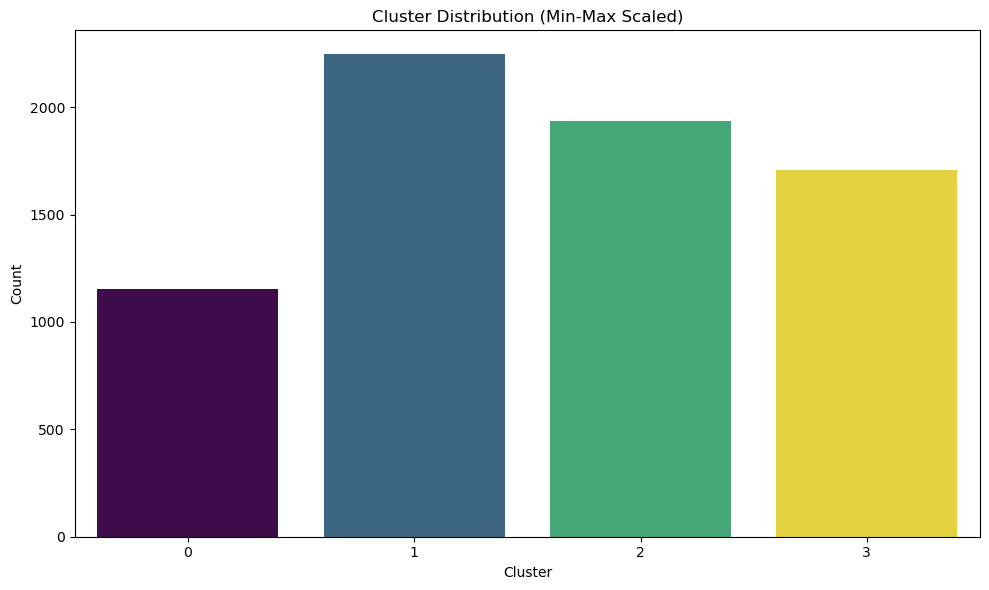

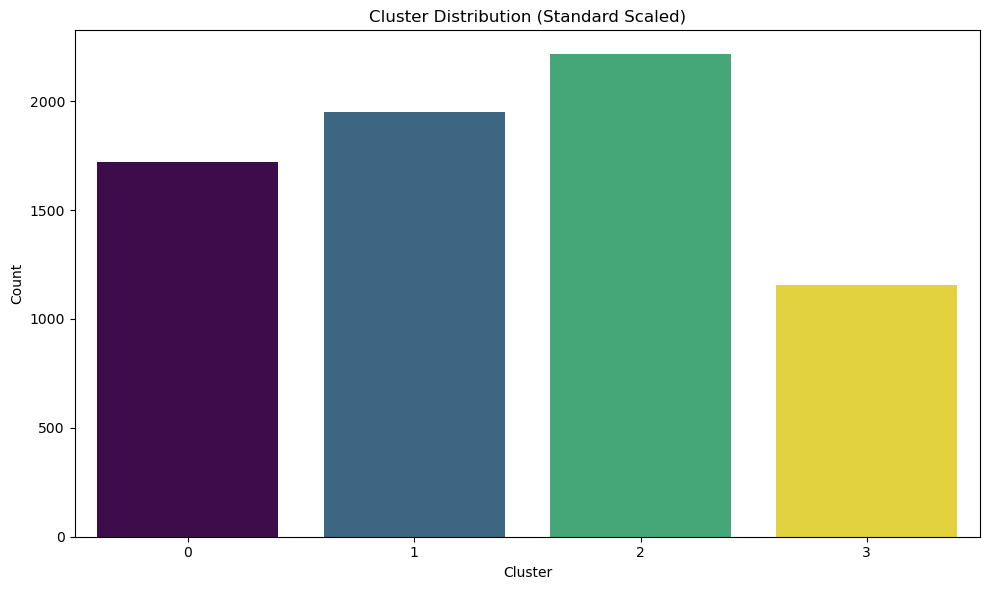

In [13]:
# plot_cluster_distribution for both min-max and stanadard data
plot_cluster_distribution(df_min_max_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_distribution(df_standard_clusters, 'Standard Scaled', visualizations_path)

### **First Plot: Cluster Distribution (Min-Max Scaled)**
This bar plot shows the distribution of customers across clusters using Min-Max scaled data. Each bar represents the number of customers in each cluster, with the data normalized to the [0, 1] range. The plot highlights how the clusters are populated after applying Min-Max scaling, with cluster 1 having the highest count and cluster 0 the lowest.

### **Second Plot: Cluster Distribution (Standard Scaled)**
This bar plot displays the distribution of customers across clusters using standardized data, where the features have a mean of zero and a standard deviation of one. The plot shows how the clusters are distributed, with cluster 2 having the most customers and cluster 3 the fewest.


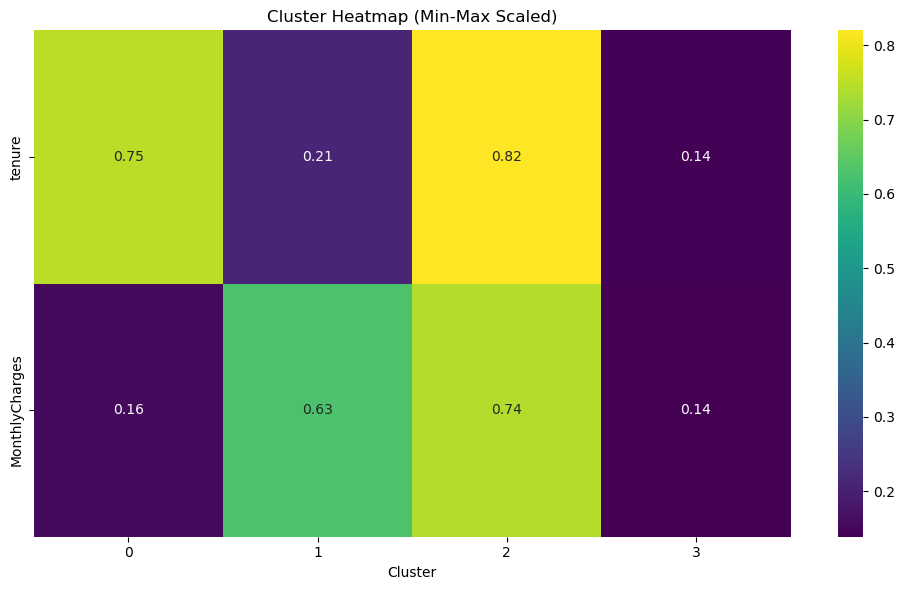

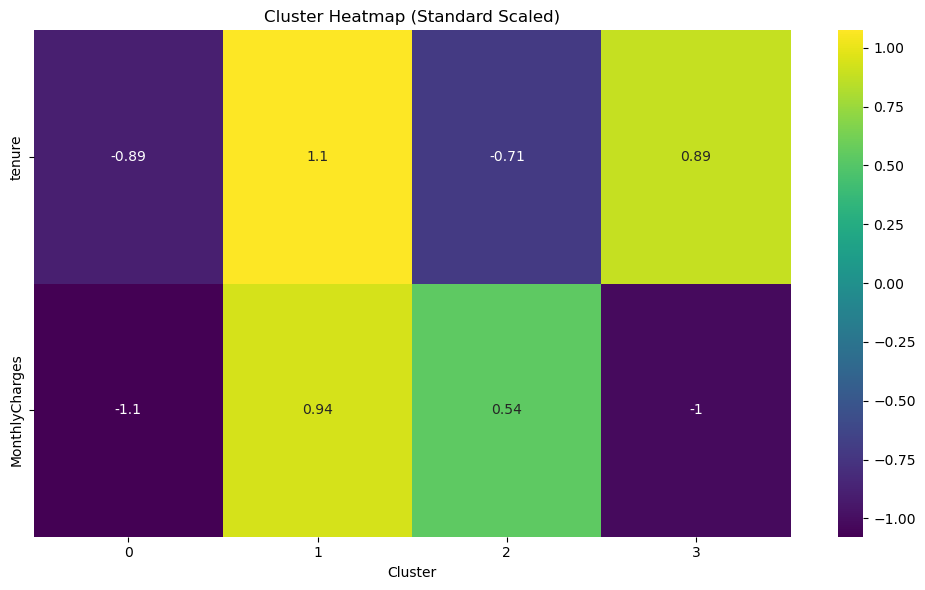

In [15]:
# plot_cluster_heatmap for both min_max scaled and standard scaled data
plot_cluster_heatmap(df_min_max_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_heatmap(df_standard_clusters, 'Standard Scaled', visualizations_path)

### **First Plot: Cluster Heatmap (Min-Max Scaled)**
This heatmap illustrates the average values of tenure and monthly charges across different customer clusters after applying Min-Max scaling. The values are normalized within the [0, 1] range, showing how each cluster compares in terms of these two features. The color intensity represents the scaled values, with higher values in yellow and lower values in purple, helping to visually distinguish the characteristics of each cluster.

### **Second Plot: Cluster Heatmap (Standard Scaled)**
This heatmap shows the average values of tenure and monthly charges across customer clusters using standardized data, where features have been normalized to have a mean of zero and a standard deviation of one. The color gradient highlights the differences between clusters, with positive values in yellow and negative values in purple, making it easy to compare how each cluster's features deviate from the standardized mean.


### Next Steps:

1. **Define the Architecture of the ANN Model**
2. **Train the ANN Model and Optimize Convergence**
3. **Predict Customer Churn Based on Critical Attributes**
